# Importing relevant packages for the drill

In [551]:
# Importing relevant packages
import pandas as pd
import numpy as np
import re
import pycountry
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.ticker as mtick

from scipy.stats import ttest_ind
from pandas_profiling import ProfileReport

# Reading CSV file and perfoming preliminary assessment

In [124]:
# Getting csv file
df = pd.read_csv('data/attacks.csv', encoding = "ISO-8859-1")
df_bkp = df.copy()



In [125]:
df.head(10)
#Several columns seem unnecessary.
#Case number seems more realible than Date


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [126]:
df.tail(10)
#End of dataset seems dirty. Furter investigation needed

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("sharks_report.html")

In [128]:
df.columns = df.columns.str.lower()

In [129]:
df = df[df['year'] > 1800]
df = df.drop(axis = 1, columns = ['unnamed: 22', 'unnamed: 23', 'href', 'href formula', 'pdf', 'original order',
                                  'investigator or source', 'time', 'injury', 'case number.2', 
                                  'case number.1', 'type', 'name', 'species ', 'case number', 'case number'])
df.head(10)

,date,year,country,area,location,activity,sex,age,fatal (y/n)
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,F,57,N
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,M,NaN,N
5,03-Jun-2018,2018.0,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,M,NaN,N
6,03-Jun-2018,2018.0,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,Y
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,N
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,N
9,26-May-2018,2018.0,USA,Florida,"Daytona Beach, Volusia County",Standing,M,12,N


In [130]:
df.tail(10)

,date,year,country,area,location,activity,sex,age,fatal (y/n)
6122,Reported 01-May-1808,1808.0,ANTIGUA,NaN,Falmouth Harbour,NaN,NaN,NaN,NaN
6123,07-Feb-1808,1808.0,INDIA,NaN,Hooghly River,Bathing,M,NaN,Y
6124,12-Jan-1807,1807.0,AUSTRALIA,New South Wales,"Cockle Bay, Sydney Harbour",NaN,M,NaN,N
6125,Aug-24-1806,1896.0,USA,NaN,NaN,NaN,M,NaN,NaN
6126,Sep-1805,1805.0,USA,New York,"Sag Harbor, Suffolk County",NaN,M,NaN,NaN
6127,Reported 26-Feb-1804,1804.0,AUSTRALIA,New South Wales,"Georges Head, off Port Jackson",NaN,NaN,NaN,N
6128,May-17-1803,1803.0,USA,South Carolina,Off Charleston,NaN,M,NaN,N
6129,Mar-1803,1803.0,AUSTRALIA,Western Australia,"Hamelin Harbour, at Faure Island",NaN,M,NaN,N
6130,Reported Apr-13-1802,1802.0,INDIA,NaN,NaN,NaN,NaN,NaN,Y
6131,Reported 18-Dec-1801,1801.0,NaN,NaN,NaN,Standing on landed shark's tail,N,NaN,Y


In [131]:
#Treating NA values
df['country'].fillna('Unknown')
df['area'].fillna('Unknown')
df['location'].fillna('Unknown')


0            Oceanside, San Diego County
1         St. Simon Island, Glynn County
2                           Habush, Oahu
3                     Arrawarra Headland
4                               La Ticla
                      ...               
6127      Georges Head, off Port Jackson
6128                      Off Charleston
6129    Hamelin Harbour, at Faure Island
6130                             Unknown
6131                             Unknown
Name: location, Length: 6130, dtype: object

# Parsing relevant columns

## Adding month column

In [132]:
#getting month info
df['date'].unique()
df['month'] = df['date'].apply(lambda x: ''.join(re.findall('-(\w{3})-', x)))

In [133]:
df.head(10)

,date,year,country,area,location,activity,sex,age,fatal (y/n),month
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,Jun
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,Jun
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,Jun
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,Jun
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,Jun
5,03-Jun-2018,2018.0,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,M,NaN,N,Jun
6,03-Jun-2018,2018.0,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,M,18,Y,Jun
7,27-May-2018,2018.0,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,N,May
8,26-May-2018,2018.0,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,N,May
9,26-May-2018,2018.0,USA,Florida,"Daytona Beach, Volusia County",Standing,M,12,N,May


In [134]:
df['month'].unique()

array(['Jun', 'May', '', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', 'AugAug', 'MarMar', 'SepSep', 'JanJan',
       'NovNov'], dtype=object)

In [135]:
df['month'] = df['month'].apply(lambda x: re.sub('AugAug', 'Aug', x))
df['month'] = df['month'].apply(lambda x: re.sub('MarMar', 'Mar', x))
df['month'] = df['month'].apply(lambda x: re.sub('SepSep', 'Sep', x))
df['month'] = df['month'].apply(lambda x: re.sub('JanJan', 'Jan', x))
df['month'] = df['month'].apply(lambda x: re.sub('NovNov', 'Nov', x))

In [136]:
df['month'].unique()

array(['Jun', 'May', '', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul'], dtype=object)

## Parsing country column

In [137]:
df['country'] = df['country'].replace(np.nan, 'Unknown', regex=True)
df['country'] = df['country'].apply(lambda x: x.strip())
country_list = sorted(df['country'].unique())

In [138]:
def get_country_code(name):
    for co in list(pycountry.countries):
        if name in co.name:
            return co.alpha_3
    return None


In [139]:
no_countries_found = []
for name in country_list:
    if get_country_code(name.title()) == None:
        no_countries_found.append(name.title())

In [140]:
df['country'] = df['country'].apply(lambda x: x.title())
df_filtered = df[df['country'].isin(no_countries_found)]

In [141]:
print(df_filtered['country'].value_counts().index.tolist())

['Usa', 'Reunion', 'Unknown', 'England', 'Pacific Ocean', 'Atlantic Ocean', 'Vietnam', 'South Atlantic Ocean', 'Columbia', 'Caribbean Sea', 'South Korea', 'Scotland', 'Okinawa', 'North Pacific Ocean', 'New Britain', 'Mid Atlantic Ocean', 'Turks & Caicos', 'North Atlantic Ocean', 'Azores', 'Persian Gulf', 'Cape Verde', 'Ceylon', 'Trinidad & Tobago', 'United Arab Emirates (Uae)', 'Central Pacific', 'St Helena, British Overseas Territory', 'South Pacific Ocean', 'Crete', 'Burma', 'West Indies', 'Southwest Pacific Ocean', 'Johnston Island', 'Solomon Islands / Vanuatu', 'Federated States Of Micronesia', 'Palestinian Territories', 'Tasman Sea', 'British Virgin Islands', 'St. Martin', 'Italy / Croatia', 'Red Sea', 'Iran / Iraq', 'Curacao', 'Netherlands Antilles', 'Grand Cayman', 'St. Maartin', 'Maldive Islands', 'Western Samoa', 'British New Guinea', 'British Isles', 'Equatorial Guinea / Cameroon', 'Diego Garcia', 'Admiralty Islands', 'South China Sea', 'Andaman / Nicobar Islandas', 'Egypt / 

In [142]:
#Preliminary regex of countries that are misspelled 
df['country'] = df['country'].apply(lambda x: re.sub('Usa', 'United States',x))
df['country'] = df['country'].apply(lambda x: re.sub('Reunion Island', 'Réunion',x))
df['country'] = df['country'].apply(lambda x: re.sub('Reunion', 'Réunion',x))
df['country'] = df['country'].apply(lambda x: re.sub('England|Scotland', 'United Kingdom',x))
df['country'] = df['country'].apply(lambda x: re.sub('Columbia', 'Colombia',x))
df['country'] = df['country'].apply(lambda x: re.sub('Turks & Caicos', 'Turks and Caicos Islands',x))
df['country'] = df['country'].apply(lambda x: re.sub('Okinawa', 'Japan',x))
df['country'] = df['country'].apply(lambda x: re.sub('Cape Vert', 'Cabo Verde',x))
df['country'] = df['country'].apply(lambda x: re.sub('Azores', 'Portugal',x))
df['country'] = df['country'].apply(lambda x: re.sub('St. Maartin', 'St. Martin',x))

df['country'] = df['country'].apply(lambda x: re.sub('Pacific Ocean', 'Unknown',x))
df['country'] = df['country'].apply(lambda x: re.sub('Indian Ocean', 'Unknown',x))
df['country'] = df['country'].apply(lambda x: re.sub('Atlantic Ocean', 'Unknown',x))


In [143]:
no_countries_found = []
for name in country_list:
    if get_country_code(name.title()) == None:
        no_countries_found.append(name.title())
        
df['country'] = df['country'].apply(lambda x: x.title())
df_filtered = df[df['country'].isin(no_countries_found)]
print(df_filtered['country'].value_counts())

Unknown                                  82
Vietnam                                  13
South Korea                               8
Caribbean Sea                             8
New Britain                               6
Persian Gulf                              4
Trinidad & Tobago                         3
Ceylon                                    3
Cape Verde                                3
Crete                                     2
Central Pacific                           2
West Indies                               2
Johnston Island                           2
Burma                                     2
United Arab Emirates (Uae)                2
St. Martin                                2
St Helena, British Overseas Territory     2
Andaman Islands                           1
British West Indies                       1
Andaman / Nicobar Islandas                1
Tasman Sea                                1
Egypt / Israel                            1
Iran / Iraq                     

In [144]:
#Second round regex of countries that are misspelled 
df['country'] = df['country'].apply(lambda x: re.sub('Cape Verde', 'Cabo Verde',x))
df['country'] = df['country'].apply(lambda x: re.sub(r'United Arab Emirates \(Uae\)', 'United Arab Emirates',x))
df['country'] = df['country'].apply(lambda x: re.sub('South Korea', 'Korea',x))
df['country'] = df['country'].apply(lambda x: re.sub('New Britain', 'Papua New Guinea',x))
df['country'] = df['country'].apply(lambda x: re.sub('Trinidad & Tobago', 'Trinidad and Tobago',x))
df['country'] = df['country'].apply(lambda x: re.sub('Vietnam', 'Viet Nam',x))

In [145]:
df_country_normalized = df[~(df['country'].isin(no_countries_found))]

In [146]:
df_country_normalized.reset_index(inplace=True)

## Parsing fatality column

In [369]:

df_country_normalized['fatal (y/n)'].fillna('UNKNOWN', inplace=True)
df_country_normalized['fatal (y/n)'].value_counts()

C:\Users\TD\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


N          4166
Y          1238
UNKNOWN     582
Name: fatal (y/n), dtype: int64

In [370]:
df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].astype(str)
df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].apply(lambda x: x.strip())

<ipython-input-370-869f7bedf593>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].astype(str)
<ipython-input-370-869f7bedf593>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].apply(lambda x: x.strip())


In [371]:
df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].apply(lambda x: re.sub(r'y', 'Y', x))
df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].apply(lambda x: re.sub(r'M', 'N', x))
df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].apply(lambda x: re.sub(r'2017', 'UNKNOWN', x))

<ipython-input-371-e92fabc602e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].apply(lambda x: re.sub(r'y', 'Y', x))
<ipython-input-371-e92fabc602e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_normalized['fatal (y/n)'] = df_country_normalized['fatal (y/n)'].apply(lambda x: re.sub(r'M', 'N', x))
<ipython-input-371-e92fabc602e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [372]:
df_country_normalized['fatal (y/n)'].value_counts()

N          4166
Y          1238
UNKNOWN     582
Name: fatal (y/n), dtype: int64

## Revisiting the month column

In [491]:
df_death_normalized = df_country_normalized.copy()

In [492]:

df_death_normalized['date'] = df_death_normalized['date'].apply(lambda x: re.sub('Reported ', '', x)) 
regex_pattern = r'([A-Z]\w\w)-?|'

df_death_normalized[df_death_normalized['month'] == '']
df_death_normalized['month'] = df_death_normalized['date'].apply(lambda x: ''.join(re.findall(r'([A-Z]\w\w)-|', x))) 

In [493]:
df_death_normalized['month'].value_counts()
df_death_normalized['month'] = df_death_normalized['month'].apply(lambda x: x[-3:])

In [494]:
df_death_normalized['month'] = df_death_normalized['month'].replace(r'^\s*$', 'Unknown', regex=True)


In [495]:
df_death_normalized['date_new'] = pd.to_datetime(df_death_normalized['date'], errors='coerce').dt.strftime("%b")

In [496]:
df_death_normalized['month'] = np.where(df_death_normalized['month'] == 'Unknown',
                                        df_death_normalized['date_new'],
                                        df_death_normalized['month'])
df_death_normalized['month'] = df_death_normalized['month'].fillna('Unknown')

In [497]:
df_death_normalized['month'].value_counts()

Jan        769
Jul        646
Aug        588
Sep        540
Jun        489
Apr        438
Oct        433
Dec        424
Mar        400
Nov        397
May        383
Feb        378
Unknown    101
Name: month, dtype: int64

In [498]:
df_death_normalized.drop(axis=1, columns=['date', 'activity', 'date_new'], inplace=True)
df_death_normalized['sex '] = df_death_normalized['sex '].fillna('Unknown')
df_death_normalized['age'] = df_death_normalized['age'].fillna('Unknown')
df_death_normalized.rename(columns={'sex ':'sex'}, inplace=True)

df_death_normalized['sex'] = np.where(np.logical_or(df_death_normalized['sex'] == 'F', 
                                                   df_death_normalized['sex'] == 'M'),
                                     df_death_normalized['sex'],
                                     'Unknown') 

## Adding decade column

In [499]:
df_decade_normalized = df_death_normalized.copy()

In [500]:
df_decade_normalized['year']= df_decade_normalized['year'].astype(str)

In [501]:
df_decade_normalized['year'].value_counts()

2015.0    142
2017.0    133
2016.0    130
2011.0    128
2014.0    125
         ... 
1841.0      1
1804.0      1
1815.0      1
1869.0      1
1802.0      1
Name: year, Length: 205, dtype: int64

In [502]:
df_decade_normalized['decade'] = df_decade_normalized['year'].apply(lambda x: x[0:3]+'0s') 


In [503]:
df_decade_normalized['decade'].value_counts()

2010s    1049
2000s    1013
1960s     599
1990s     566
1950s     449
1980s     433
1970s     325
1930s     269
1940s     254
1920s     206
1900s     151
1910s     145
1890s     135
1880s     109
1870s      87
1860s      63
1840s      41
1850s      38
1830s      19
1820s      16
1810s      10
1800s       9
Name: decade, dtype: int64

In [532]:
df_final = df_decade_normalized.copy()
df_final.to_csv('data/sharks_final.csv',index=False)

# Answering questions

## Are sharks becoming less deadly over the years?

In [505]:
df_q1 = df_final.copy()

In [506]:
df_q1 = df_q1[df_q1['fatal (y/n)'] != 'UNKNOWN']

In [507]:
pt_q1 = pd.pivot_table(df_q1,index='decade',
               values = 'year',
                  columns='fatal (y/n)', 
                  aggfunc='count')

In [508]:
pt_q1['Total'] =pt_q1['Y'] + pt_q1['N']  
pt_q1['Letality pct.'] = pt_q1['Y']/pt_q1['Total']

In [509]:
pt_q1.index

Index(['1800s', '1810s', '1820s', '1830s', '1840s', '1850s', '1860s', '1870s',
       '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
       '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'],
      dtype='object', name='decade')

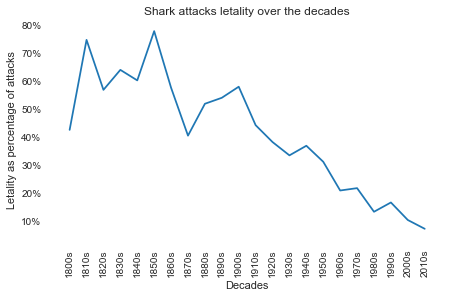

In [510]:
x = pt_q1.index
y = pt_q1['Letality pct.']

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

ax.plot(x,y*100)
plt.title('Shark attacks letality over the decades')
plt.xlabel('Decades')
plt.ylabel('Letality as percentage of attacks')

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

plt.xticks(rotation=90)

plt.show()

As we can see from the chart above, <font color='red'>**letality rate has sharply dropped over the last 50 years and one may assume that shark attacks are becoming less deadly.**</font>

Few caveats to this assumption:
> 1. More non-fatal shark attack incidents are being recorded now, which increases the fatality rate denominator and imply a lower ratio

## Are men more prone to die when attacked by sharks?

In [511]:
df_q2 = df_final.copy()

In [512]:
df_q2['check_death'] = np.where(df_q2['fatal (y/n)'] == 'Y', 
                               True,
                               np.where(df_q2['fatal (y/n)'] == 'N',
                                False,
                                np.nan))

In [513]:
df_q2['check_death'].value_counts()

0.0    4166
1.0    1238
Name: check_death, dtype: int64

In [518]:
df_q2.groupby(by='sex').agg(Mean_death = ('check_death', 'mean'),
                           Std_Death = ('check_death', 'std'),
                           Count_death = ('check_death', 'count'))

,Mean_death,Std_Death,Count_death
sex,,,
F,0.177858,0.382741,551
M,0.236759,0.425141,4418
Unknown,0.216092,0.412052,435


In [528]:
pop_male = df_q2[df_q2['sex'] == 'M']['check_death'].dropna()
pop_female = df_q2[df_q2['sex'] == 'F']['check_death'].dropna()

In [529]:
ttest_ind(pop_male, pop_female)

Ttest_indResult(statistic=3.0991587518744077, pvalue=0.0019515630735905507)

As we can see from the cell above, <font color='red'>**p-value is signficantly lower than 5% and infers that men are more prone to die by a shark attack.**</font>

Few caveats to this assumption:
> 1. There is a huge discrepancy when comparing the Ns of both populations (4418 vs 551)
> 2. Men could be more prone to perform radical sports on the water, such as surfing, which might impact their chance of survival given a shark attack 

## What are the most letal shark-attacking regions of the world?

In [540]:
df_q3 = df_final.copy()

df_q3['check_death'] = np.where(df_q3['fatal (y/n)'] == 'Y', 
                               True,
                               np.where(df_q3['fatal (y/n)'] == 'N',
                                False,
                                np.nan))

df_q3_grouped = df_q3.groupby(by='country').agg(Mean_death = ('check_death', 'mean'),
                           Std_Death = ('check_death', 'std'),
                           Count_death = ('check_death', 'count'))

In [541]:
df_q3_grouped[df_q3_grouped['Count_death'] > 30]

,Mean_death,Std_Death,Count_death
country,,,
Australia,0.231029,0.421669,1186
Bahamas,0.099010,0.300165,101
Brazil,0.372549,0.485871,102
Cuba,0.589744,0.498310,39
Egypt,0.342857,0.481594,35
Fiji,0.366667,0.485961,60
India,0.625000,0.491869,32
Italy,0.220000,0.418452,50
Japan,0.470588,0.506640,34


As we can see from the table above, there are 4 countries (Philippines, India, Cuba and Mexico - excluding countries with less than 30 incidents) with a high incidence of death from a shark attack when compared to chance (c. 50%)

Few caveats to this assumption:
> 1. All above-mentioned countries have low Ns, which might imply that their healthcare systems are  not well-equipped to handling shark attacks (when compared to high N countries such as Australia and the US)

Digging deeper now, focusing on countries' subregions...:

In [543]:
df_q3_grouped_region = df_q3.groupby(by=['country', 'area']).agg(Mean_death = ('check_death', 'mean'),
                           Std_Death = ('check_death', 'std'),
                           Count_death = ('check_death', 'count'))

In [548]:
df_q3_grouped_region[df_q3_grouped_region['Count_death'] > 30]

Mean_death  Std_Death  Count_death
country       area                                                     
Australia     New South Wales          0.226107   0.418798          429
              Queensland               0.258865   0.438790          282
              South Australia          0.255102   0.438160           98
              Tasmania                 0.212121   0.415149           33
              Torres Strait            0.338462   0.476869           65
              Victoria                 0.166667   0.375090           78
              Western Australia        0.171779   0.378351          163
Brazil        Pernambuco               0.414286   0.496155           70
New Zealand   North Island             0.206897   0.408619           58
              South Island             0.194444   0.401386           36
South Africa  Eastern Cape Province    0.149660   0.357957          147
              KwaZulu-Natal            0.259036   0.439431          166
              Western Cape Province    0.175824   0.381721          182
United States California               0.069767   0.255250          258
              Florida                  0.046073   0.209754          955
              Hawaii                   0.175781   0.381380          256
              New Jersey               0.127660   0.337318           47
              North Carolina           0.109890   0.314485           91
              South Carolina           0.079710   0.271831          138
              Texas                    0.102941   0.306141           68

Finally, as we can see from the table above, <font color='red'>**Pernambuco in Brazil appears to be the most dangerous shark-attacking**</font> (with N>30 over the observed horizon - 1800-2018) region in the world (c. 41% deadly incidence).

Few <font color='red'>**interesting insights**</font> from this assessment:
> 1. High N regions in the US, such as Florida and California, have relatively lower fatality rate when compared to other regions' across the globe with similar Ns
> 2. Australia has a wide range of fatality rate across its states - ranging from 17% in Victoria to 34% in Torres Straits
> 3. New Zealand has very similar fatality rates over its two main islands